In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!ls '/content/gdrive/MyDrive/Datasets'

import os
import pathlib
import glob
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Mounted at /content/gdrive
Dataset_bsl


In [ ]:
!pip install memory-profiler
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

RuntimeError: ignored

x

In [ ]:
x_images = np.load('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/train_img_poseblack_removedundetected.npy')
y_labels = np.load('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/train_label_poseblack_removedundetected.npy')

# x_images = np.load('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/train_img.npy')
# y_labels = np.load('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/train_label.npy')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    x_images, y_labels, test_size=0.1, random_state=42)

# Print the shapes of the train and test sets
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

del x_images
del y_labels
train_images.shape

Train images shape: (69345, 64, 64, 3)
Train labels shape: (69345,)
Test images shape: (7706, 64, 64, 3)
Test labels shape: (7706,)


(69345, 64, 64, 3)

In [ ]:
del test_images
del test_labels

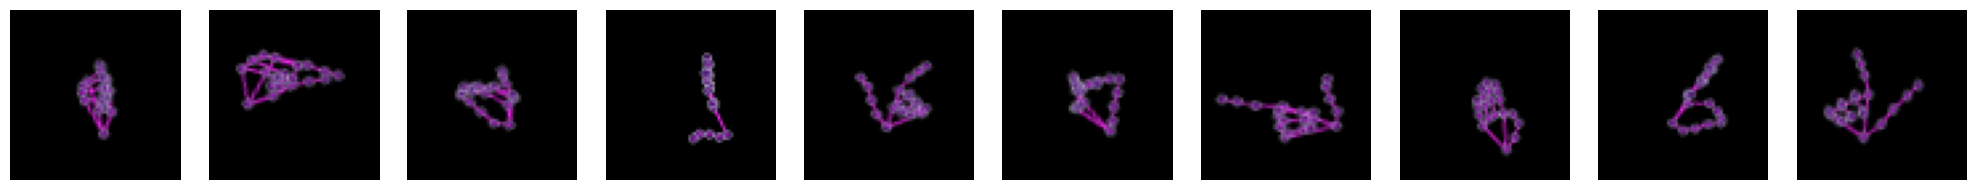

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# Load the numpy file containing the 1000 photos

# Choose 10 random indices for the photos
random_indices = np.random.choice(train_images.shape[0], size=10, replace=False)

# Create a figure to display the photos horizontally
fig = plt.figure(figsize=(20, 2))
for i, index in enumerate(random_indices):
    ax = fig.add_subplot(1, 10, i+1)
    train_images[index] = cv2.cvtColor(train_images[index], cv2.COLOR_BGR2RGB)
    ax.imshow(train_images[index].astype("uint8"))
    ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()

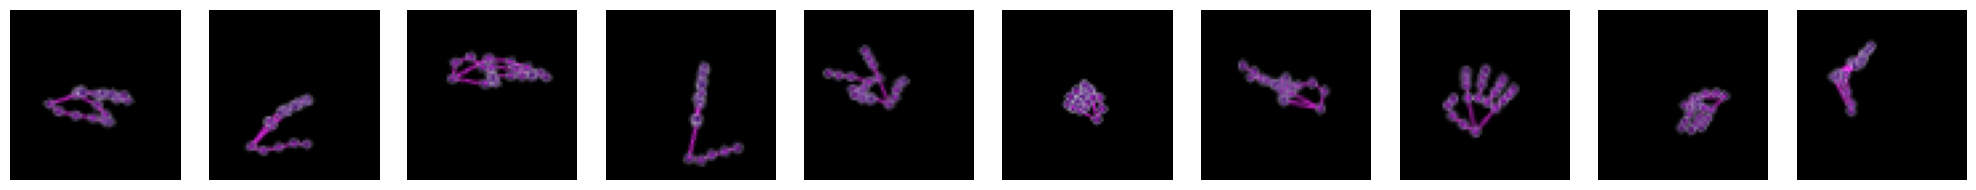

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy file containing the 1000 photos

# Choose 10 random indices for the photos
random_indices = np.random.choice(test_images.shape[0], size=10, replace=False)

# Create a figure to display the photos horizontally
fig = plt.figure(figsize=(20, 2))
for i, index in enumerate(random_indices):
    ax = fig.add_subplot(1, 10, i+1)
    test_images[index] = cv2.cvtColor(test_images[index], cv2.COLOR_BGR2RGB)
    ax.imshow(test_images[index].astype("uint8"))
    ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()

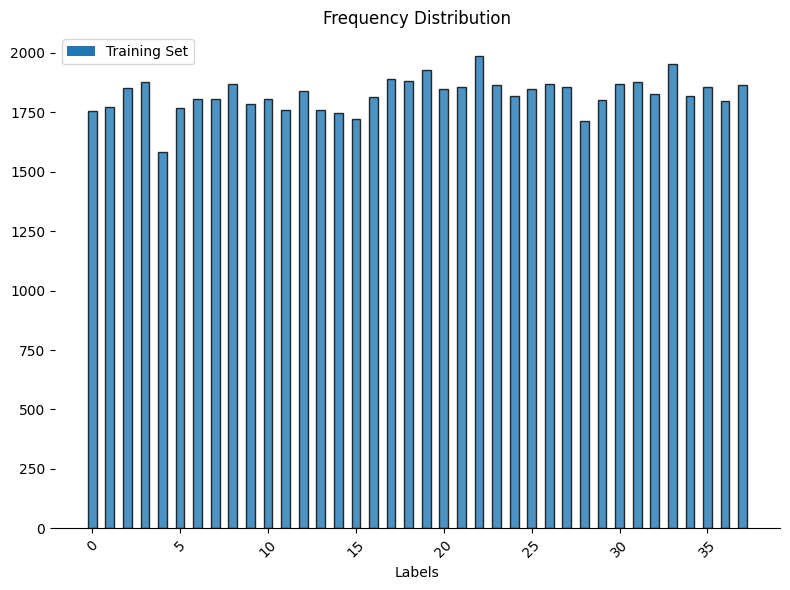

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy files
labels = train_labels

# Calculate the unique labels and their frequencies
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the bar chart
bar_color = '#1f77b4' # Red color for the bars
bar_width = 0.5  # Width of the bars
bar_alpha = 0.8  # Transparency of the bars
bar_edgecolor = 'black'  # Edge color of the bars

# Create the bar plot
bar_plot = ax.bar(unique_labels, label_counts, width=bar_width, color=bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)

# Set labels and title
ax.set_xlabel('Labels')
ax.set_title('Frequency Distribution')

# Customize ticks and gridlines
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='')

# Remove margins
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add a custom legend for the color
custom_legend = [plt.Rectangle((0, 0), 1, 1, fc=bar_color)]
legend_labels = ['Training Set']

# Display the legend
ax.legend(custom_legend, legend_labels)

# Adjust spacing
fig.tight_layout()

# Show the customized bar chart
plt.show()

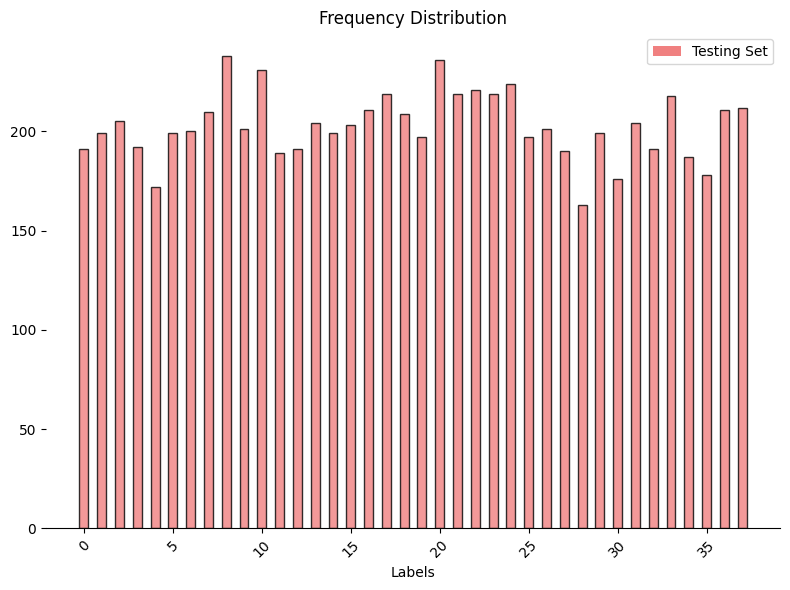

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy files
labels = test_labels

# Calculate the unique labels and their frequencies
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the bar chart
bar_color = 'lightcoral' # Red color for the bars
bar_width = 0.5  # Width of the bars
bar_alpha = 0.8  # Transparency of the bars
bar_edgecolor = 'black'  # Edge color of the bars

# Create the bar plot
bar_plot = ax.bar(unique_labels, label_counts, width=bar_width, color=bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)

# Set labels and title
ax.set_xlabel('Labels')
ax.set_title('Frequency Distribution')

# Customize ticks and gridlines
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='')

# Remove margins
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add a custom legend for the color
custom_legend = [plt.Rectangle((0, 0), 1, 1, fc=bar_color)]
legend_labels = ['Testing Set']

# Display the legend
ax.legend(custom_legend, legend_labels)

# Adjust spacing
fig.tight_layout()

# Show the customized bar chart
plt.show()

s

In [ ]:

from keras.utils import to_categorical
num_classes = 38
test_labels_one_hot = to_categorical(test_labels, num_classes)

In [ ]:
image_height, image_width, num_channels = train_images.shape[1:]

num_classes = 38

from keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels, num_classes)


from keras.utils import to_categorical
num_classes = 38
test_labels_one_hot = to_categorical(test_labels, num_classes)

import tensorflow as tf

tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=8
)

#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(verbose=1,min_lr=0.00000001, patience=15,),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout


# Define the model architecture
model = tf.keras.Sequential([
    # Input layer
    layers.Input(shape=(image_height, image_width, num_channels)),

    # Convolutional layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.MaxPooling2D(pool_size=(2, 2), strides=1),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),


    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.MaxPooling2D(pool_size=(2, 2), strides=1),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    #layers.Dropout(0.5),

    # Flatten layer
    layers.Flatten(),

    # Dense layers
    layers.Dense(units=256, activation='relu'),
    # layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=num_classes, activation='softmax')
])


#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)
#optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mode_history = model.fit(train_images, train_labels_one_hot, epochs=80, batch_size=224, validation_data=(test_images, test_labels_one_hot), callbacks=[callbacks])

Epoch 1/80
310/310 [==============================] - 90s 226ms/step - loss: 3.6477 - accuracy: 0.0413 - val_loss: 3.5734 - val_accuracy: 0.0481 - lr: 0.0010
Epoch 2/80
310/310 [==============================] - 66s 212ms/step - loss: 3.5495 - accuracy: 0.0541 - val_loss: 3.3749 - val_accuracy: 0.0879 - lr: 0.0010
Epoch 3/80
310/310 [==============================] - 67s 216ms/step - loss: 3.3328 - accuracy: 0.0827 - val_loss: 2.9157 - val_accuracy: 0.1643 - lr: 0.0010
Epoch 4/80
310/310 [==============================] - 67s 217ms/step - loss: 2.9341 - accuracy: 0.1459 - val_loss: 2.4470 - val_accuracy: 0.2761 - lr: 0.0010
Epoch 5/80
310/310 [==============================] - 66s 212ms/step - loss: 2.3914 - accuracy: 0.2556 - val_loss: 1.5932 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 6/80
310/310 [==============================] - 66s 212ms/step - loss: 1.8630 - accuracy: 0.3959 - val_loss: 1.1622 - val_accuracy: 0.6215 - lr: 0.0010
Epoch 7/80
310/310 [==============================] 

In [ ]:
print(train_labels.shape)
print(train_images.shape)

(69345,)
(69345, 64, 64, 3)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 16.9 MB/s eta 0:00:00


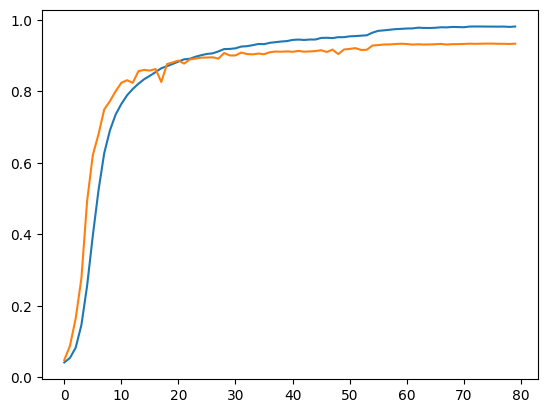

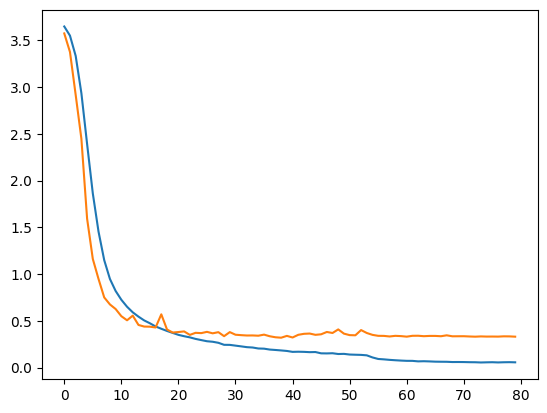

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(mode_history.history["accuracy"])
plt.plot(mode_history.history["val_accuracy"])
plt.figure()
plt.plot(mode_history.history["loss"])
plt.plot(mode_history.history["val_loss"])

!pip install visualkeras

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
def plot_model_training_curve(history):
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Model Accuracy', 'Model Loss'])
    fig.add_trace(
        go.Scatter(
            y=history.history['accuracy'],
            name='train_acc'),
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_accuracy'],
            name='val_acc'),
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['loss'],
            name='train_loss'),
        row=1, col=2)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_loss'],
            name='val_loss'),
        row=1, col=2)
    fig.show()

plot_model_training_curve(mode_history)

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

color_map = defaultdict(dict)
color_palette = ['lightblue', 'lightcoral', 'lightgreen', 'lightgray', 'lightsalmon']

color_map[layers.Conv2D]['fill'] = color_palette[0]
color_map[layers.MaxPooling2D]['fill'] = color_palette[1]
color_map[layers.Dense]['fill'] = color_palette[2]
color_map[layers.Flatten]['fill'] = color_palette[3]
color_map[layers.BatchNormalization]['fill'] = color_palette[4]

from PIL import ImageFont

import visualkeras
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 63, 63, 64)       2

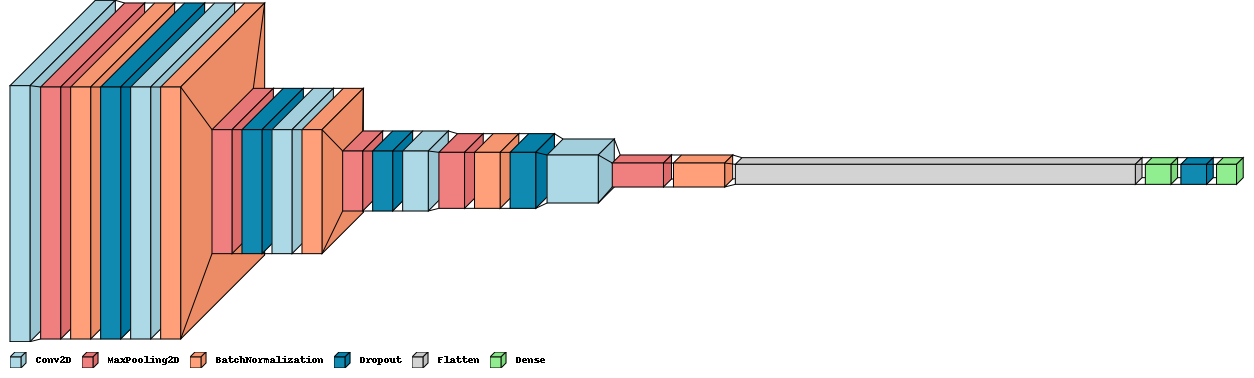

In [ ]:

visualkeras.layered_view(model, legend=True,color_map=color_map)

In [ ]:
#Khan.abrar.shams@g.bracu.ac.bd
model.save('/content/gdrive/MyDrive/pre2_models/poseestimatorCNN.h5')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions on the test set
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels_one_hot, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)


241/241 [==============================] - 4s 11ms/step
Confusion Matrix:
[[181   6   0 ...   0   0   0]
 [  4 193   0 ...   0   0   0]
 [  0   0 202 ...   0   0   0]
 ...
 [  0   0   0 ... 167   0   0]
 [  0   0   0 ...   0 196   1]
 [  0   0   0 ...   0   0 204]]


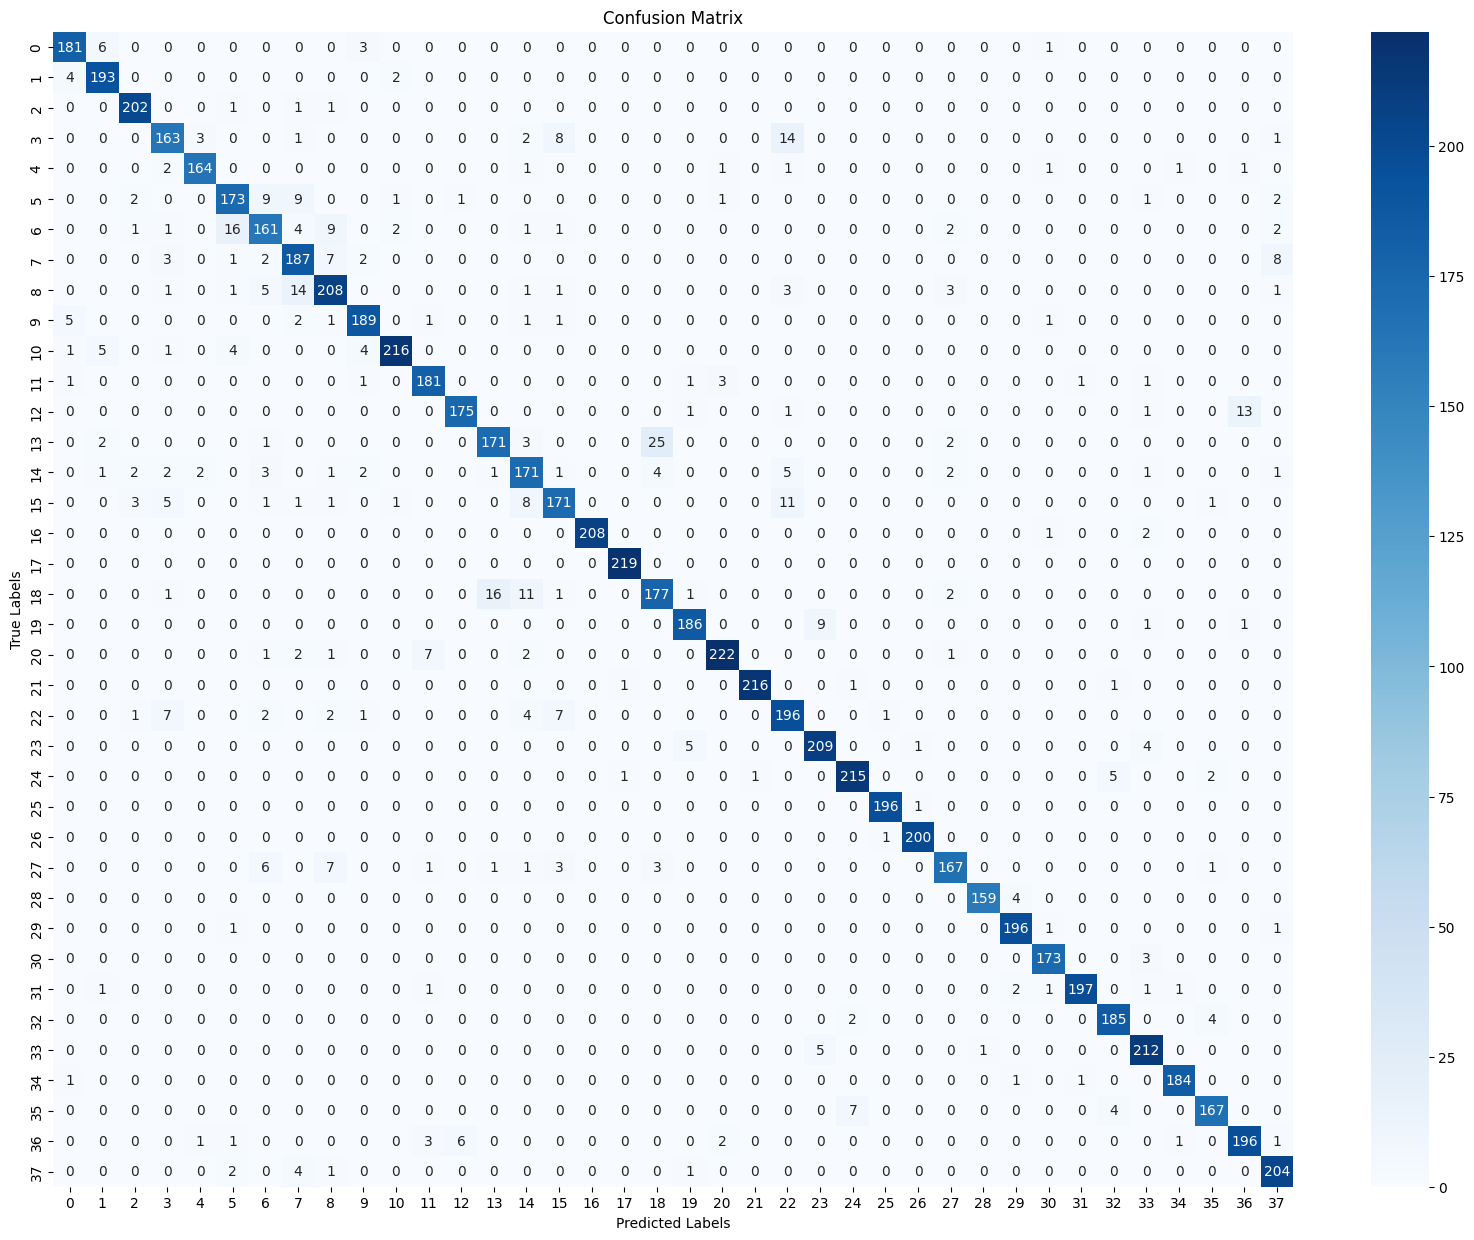

In [ ]:

# Plot the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

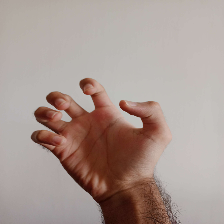

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/pre2_models/poseestimatorCNN.h5')

# Define class labels (replace with your own labels if needed)
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']
# Load and resize the input image



image = cv2.imread('/content/IMG_20230522_130837.jpg') #class
frame = cv2.resize(image, (224, 224))
cv2_imshow(frame)
!pip install mediapipe opencv-python
import mediapipe as mp
import os
import cv2
from google.colab.patches import cv2_imshow
import uuid
import numpy as np
mp_drawing = mp.solutions.drawing_utils

In [ ]:
!pip install mediapipe opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 49.8 MB/s eta 0:00:00


In [ ]:
import mediapipe as mp
import os
import cv2
from google.colab.patches import cv2_imshow
import uuid
import numpy as np
mp_drawing = mp.solutions.drawing_utils

ModuleNotFoundError: ignored

In [ ]:

mp_drawing = mp.solutions.drawing_utils
# mp_hands = mp.solutions.hand

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=960dc4f5d69df2b38a852bd263688602f44acb8526ca40d86d12112e3c253c55
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


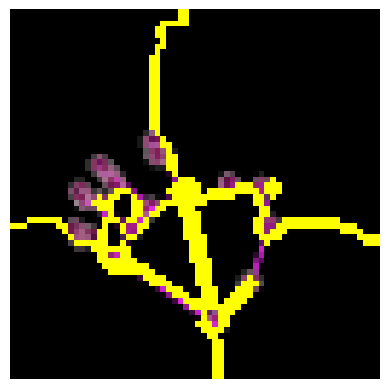

In [ ]:
import tensorflow as tf
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
from lime import lime_image

# Load or train your deep learning model


# Load the image you want to explain

# Define the function to preprocess the image and make predictions
def predict_fn(images):
    preprocessed_images = np.copy(images)
    # Apply any necessary preprocessing to the image
    predictions = model.predict(preprocessed_images)
    return predictions

# Create the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Generate an explanation for the image
explanation = explainer.explain_instance(image, predict_fn, top_labels=1, hide_color=0, num_samples=1000)

# Get the superpixel segmentation of the image
segments = skimage.segmentation.mark_boundaries(image, explanation.segments)

# Visualize the superpixel segmentation
plt.imshow(segments)
plt.axis('off')
plt.show()

# # Resize the segments to match the image size
# resized_segments = skimage.transform.resize(explanation.segments, saved.shape[:2], order=0, anti_aliasing=False, preserve_range=True)

# segments = skimage.segmentation.mark_boundaries(saved, resized_segments, color=(.1, .5, 1))  # Set color to light red

# Visualize the superpixel segmentation
# plt.imshow(segments)
# plt.axis('off')
# plt.show()



#feature map

1/1 [==============================] - 0s 412ms/step
(1, 63, 63, 32)
(1, 63, 63, 32)
(1, 63, 63, 32)
(1, 63, 63, 64)
(1, 63, 63, 64)
(1, 31, 31, 64)
(1, 31, 31, 64)
(1, 31, 31, 128)
(1, 31, 31, 128)
(1, 15, 15, 128)
(1, 15, 15, 128)
(1, 15, 15, 256)
(1, 14, 14, 256)
(1, 14, 14, 256)
(1, 14, 14, 256)
(1, 12, 12, 512)
(1, 6, 6, 512)
(1, 6, 6, 512)
(1, 18432)
(1, 256)
(1, 256)
(1, 38)


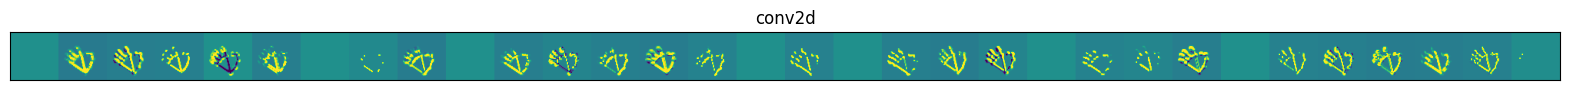

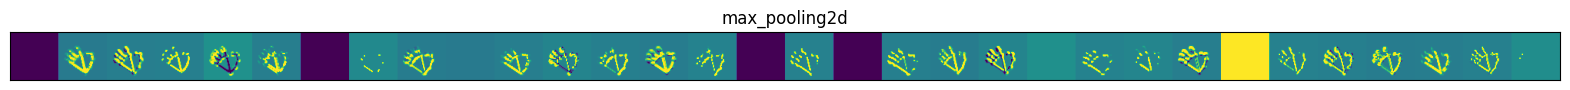

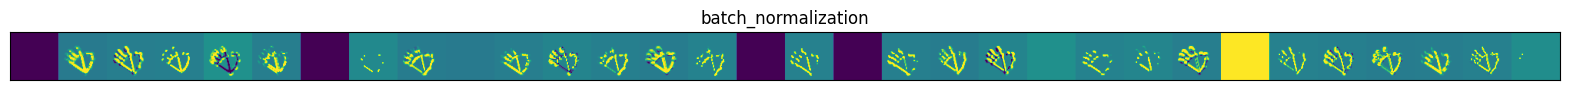

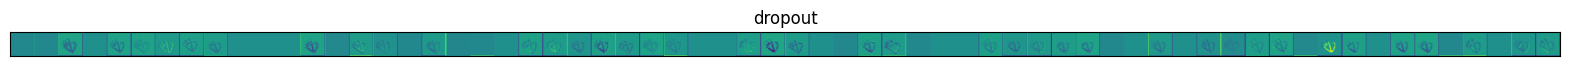

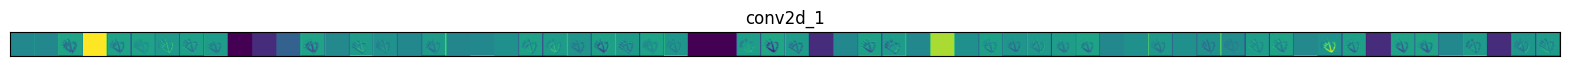

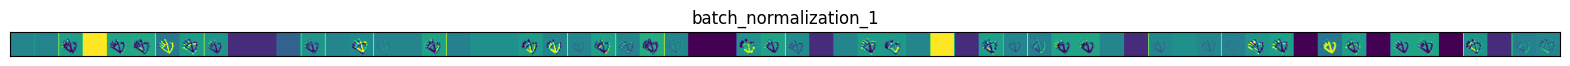

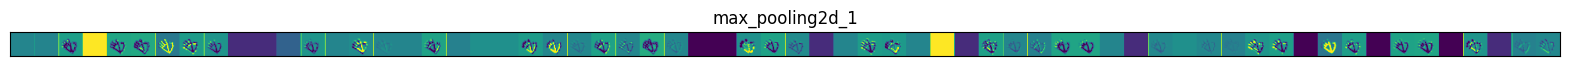

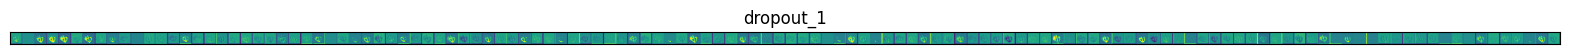

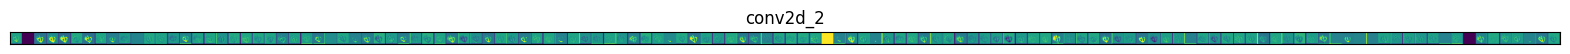

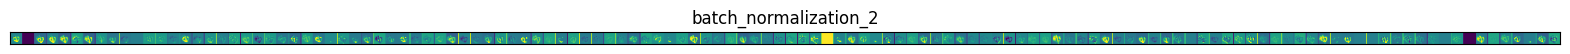

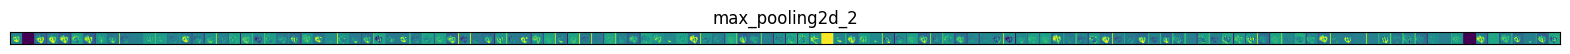

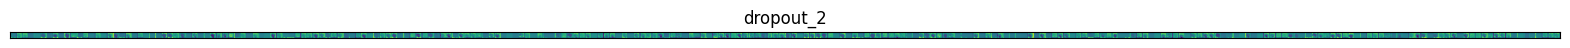

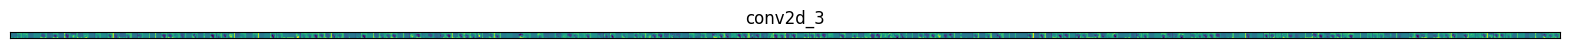

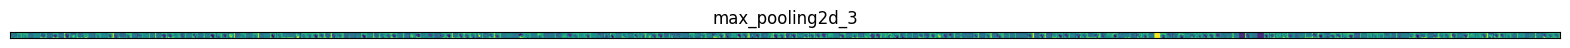

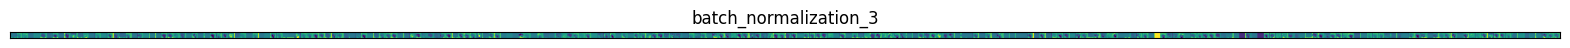

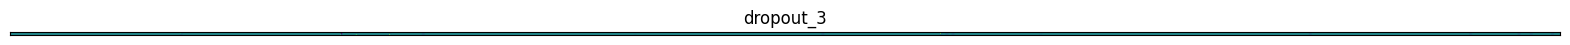

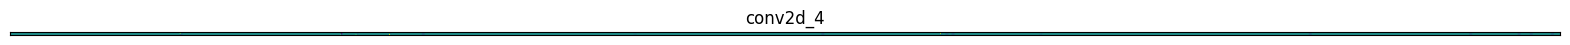

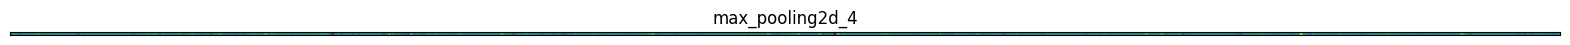

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/pre2_models/poseestimatorCNN.h5')


# Define a new Model, Input=image, Output=intermediate representations for all layers in the model after the first
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Load the input image
img = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)

# Convert the image to an array of dimension (64, 64, 3)
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x_min = np.min(x)
x_max = np.max(x)
x = (x - x_min) / (x_max - x_min)  # Apply min-max normalization

# Run the input image through the visualization network to obtain all intermediate representations
successive_feature_maps = visualization_model.predict(x)

# Retrieve the names of the layers
layer_names = [layer.name for layer in model.layers]

# Visualize the feature maps
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
        # Plot feature maps for the conv/maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # Number of features in the feature map
        size = feature_map.shape[1]  # Feature map shape (1, size, size, n_features)

        # Create a grid to tile the feature maps
        display_grid = np.zeros((size, size * n_features))

        # Postprocess the feature maps to be visually palatable
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            std = x.std()
            epsilon = 1e-8  # Small epsilon value to avoid division by zero
            x /= (std + epsilon)
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into the display grid
            display_grid[:, i * size: (i + 1) * size] = x

        # Display the grid
        scale = 20.0 / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/pre2_models/poseestimatorCNN.h5')
from keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels, 38)
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions using the loaded model
predictions = model.predict(train_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to categorical labels
true_labels = np.argmax(train_labels_one_hot, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

2168/2168 [==============================] - 22s 7ms/step
Precision: 0.9995539506166417
Recall: 0.9995529598384887
F1 Score: 0.9995530147364676


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions using the loaded model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to categorical labels
true_labels = np.argmax(test_labels_one_hot, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

241/241 [==============================] - 2s 7ms/step
Precision: 0.933353926049486
Recall: 0.9330391902413704
F1 Score: 0.9329714524916746


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf
model = tf.keras.models.load_model('/content/gdrive/MyDrive/pre2_models/poseestimatorCNN.h5')
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels_one_hot, axis=1)
report = classification_report(true_labels, predicted_labels)
print(report)


241/241 [==============================] - 11s 8ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       191
           1       0.93      0.97      0.95       199
           2       0.96      0.99      0.97       205
           3       0.88      0.85      0.86       192
           4       0.96      0.95      0.96       172
           5       0.86      0.87      0.87       199
           6       0.84      0.81      0.82       200
           7       0.83      0.89      0.86       210
           8       0.87      0.87      0.87       238
           9       0.94      0.94      0.94       201
          10       0.97      0.94      0.95       231
          11       0.93      0.96      0.95       189
          12       0.96      0.92      0.94       191
          13       0.90      0.84      0.87       204
          14       0.83      0.86      0.84       199
          15       0.88      0.84      0.86       203
          16       1.00  

In [ ]:
!pip install mediapipe opencv-python

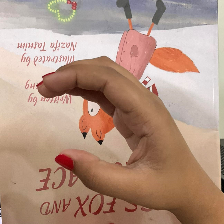

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/pre2_models/poseestimatorCNN.h5')

# Define class labels (replace with your own labels if needed)
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']
# Load and resize the input image



image = cv2.imread('/content/348356811_169536676067543_3535269701015337700_n.jpg') #class
frame = cv2.resize(image, (224, 224))
cv2_imshow(frame)
import mediapipe as mp
import os
import cv2
from google.colab.patches import cv2_imshow
import uuid
import numpy as np
mp_drawing = mp.solutions.drawing_utils

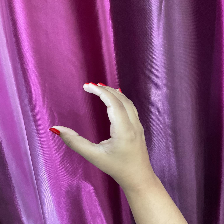

<class 'mediapipe.python.solution_base.SolutionOutputs'>


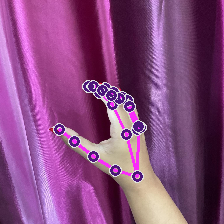

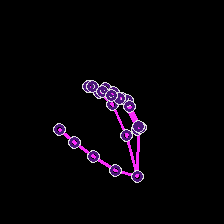

In [ ]:
import cv2
import mediapipe as mp


loc = cv2.imread("/content/348356811_169536676067543_3535269701015337700_n.jpg")
frame = loc


frame = cv2.resize(frame, (224,224))
cv2_imshow(frame)
# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

with mp_hands.Hands(min_detection_confidence=0, min_tracking_confidence=0.5) as hands:
    # BGR 2 RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Flip on horizontal
    # image = cv2.flip(image, 1)

    # Set flag
    image.flags.writeable = False

    # Detections
    results = hands.process(image)

    # Set flag to true
    image.flags.writeable = True

    # RGB 2 BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Detections
    print(results)

    # Rendering results
    if results.multi_hand_landmarks:
        for num, hand in enumerate(results.multi_hand_landmarks):
            mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                      mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                      )

    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

saved = image


import cv2
import numpy as np
import mediapipe as mp


frame = loc
frame = cv2.resize(frame, (224, 224))
# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

with mp_hands.Hands(min_detection_confidence=0.2, min_tracking_confidence=0.5) as hands:
    # BGR 2 RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Flip on horizontal
    # image = cv2.flip(image, 1)

    # Set flag
    image.flags.writeable = False

    # Detections
    results = hands.process(image)

    # Set flag to true
    image.flags.writeable = True

    # Create a black background image
    image = np.zeros_like(image)

    # Detections
    #print(results)

    # Rendering results
    if results.multi_hand_landmarks:
        for num, hand in enumerate(results.multi_hand_landmarks):
            mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                      mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                      )

    cv2_imshow(image)


1/1 [==============================] - 8s 8s/step
Predicted class: 19


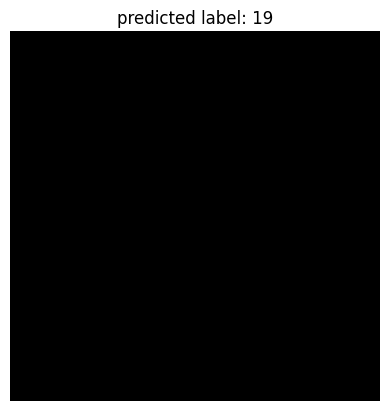

In [ ]:

image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)

# Preprocess the image
preprocessed_image = image

# Make predictions
predictions = model.predict(np.expand_dims(preprocessed_image, axis=0))

# Process the predictions
predicted_class = np.argmax(predictions)
predicted_label = class_labels[predicted_class]

# Print the predicted class/label
print("Predicted class:", predicted_class)

# Display the image with the predicted label
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("predicted label: "+ predicted_label)
plt.axis('off')
plt.show()